In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = 'organic food ireland' #near:"Dublin"'
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)



In [3]:
df_tweets.to_csv('tweets_organic_food ireland.csv')

In [4]:
#Cleaning Data-adding column location
df_tweets['user_location'] =  df_tweets['user'].apply(lambda x: x['location'])

In [5]:
#Cleaning Data-flter and keep only columns that we will use in the dataset
df_tweets= df_tweets.filter(['content','user_location'], axis=1)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        1748 non-null   object
 1   user_location  1748 non-null   object
dtypes: object(2)
memory usage: 27.4+ KB


In [6]:
#Cleaning Data-change words in the 'content' column to lower case
df_tweets['content'] = df_tweets['content'].apply(lambda x:x.lower())
df_tweets['content']

0       @mjc0ughl4n the quality of food/availability o...
1       @codohertynews more and more land being given ...
2       i hope you’ve enjoyed this series, that it has...
3       consider the seed\nhttps://t.co/skc2vwekuo\nas...
4       organic fitness with fitness trainer and organ...
                              ...                        
1743    very cool: organic supermarket in ireland comb...
1744    rt @organic_ireland today's wise advice "eat f...
1745    rt @neilers if you like organic food then chec...
1746    +101 new entry: organic food ireland | pasta, ...
1747    organic guide: a publication of interest to ev...
Name: content, Length: 1748, dtype: object

In [7]:
#import natural processing toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Cleaning Data-remove english stopwords
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_tweets['content'].head()

0    @mjc0ughl4n quality food/availability organic,...
1    @codohertynews land given energy production. l...
2    hope you’ve enjoyed series, provoked food thou...
3    consider seed https://t.co/skc2vwekuo growing ...
4    organic fitness fitness trainer organic grower...
Name: content, dtype: object

In [9]:
#Cleaning Data-remove special characters
df_tweets['content'] = df_tweets['content'].str.replace('[^\w\s]','')
df_tweets['content'].head()

0    mjc0ughl4n quality foodavailability organic hi...
1    codohertynews land given energy production lar...
2    hope youve enjoyed series provoked food though...
3    consider seed httpstcoskc2vwekuo growing gold ...
4    organic fitness fitness trainer organic grower...
Name: content, dtype: object

In [10]:
#Cleaning Data-check for most frequent words in the 'content column'
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('organic', 1984),
 ('food', 1677),
 ('ireland', 1469),
 ('amp', 280),
 ('irelands', 215),
 ('foods', 188),
 ('organicfood', 148),
 ('good', 143),
 ('farm', 121),
 ('local', 121),
 ('irish', 120),
 ('farming', 120),
 ('produce', 97),
 ('healthy', 95),
 ('market', 83),
 ('best', 83),
 ('first', 82),
 ('great', 78),
 ('farmers', 76),
 ('one', 71),
 ('health', 69),
 ('fair', 69),
 ('people', 67),
 ('production', 67),
 ('northern', 67),
 ('like', 66),
 ('would', 66),
 ('national', 65),
 ('free', 63),
 ('new', 61),
 ('uk', 60),
 ('us', 58),
 ('green', 58),
 ('dublin', 58),
 ('rt', 58),
 ('grow', 57),
 ('learn', 53),
 ('producers', 53),
 ('via', 52),
 ('vegan', 52),
 ('products', 51),
 ('eu', 49),
 ('fresh', 49),
 ('growing', 48),
 ('buy', 48),
 ('news', 48),
 ('sustainable', 47),
 ('range', 46),
 ('restaurant', 45),
 ('agriculture', 45)]

In [11]:

nltk.download('wordnet')
from textblob import Word
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_tweets['content'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    mjc0ughl4n quality foodavailability organic hi...
1    codohertynews land given energy production lar...
2    hope youve enjoyed series provoked food though...
3    consider seed httpstcoskc2vwekuo growing gold ...
4    organic fitness fitness trainer organic grower...
Name: content, dtype: object

In [12]:
#Cleaning Data-check for most frequent words in the 'content column' after applying lemmatiser
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('organic', 1993),
 ('food', 1865),
 ('ireland', 1684),
 ('amp', 280),
 ('good', 148),
 ('organicfood', 148),
 ('farm', 140),
 ('local', 122),
 ('irish', 120),
 ('farming', 120),
 ('farmer', 118),
 ('produce', 100),
 ('healthy', 95),
 ('market', 90),
 ('best', 83),
 ('first', 82),
 ('great', 78),
 ('one', 74),
 ('product', 71),
 ('health', 69),
 ('fair', 69),
 ('people', 68),
 ('production', 67),
 ('like', 67),
 ('northern', 67),
 ('would', 66),
 ('national', 65),
 ('u', 64),
 ('uk', 64),
 ('free', 64),
 ('producer', 63),
 ('restaurant', 62),
 ('new', 61),
 ('green', 59),
 ('year', 59),
 ('dublin', 58),
 ('rt', 58),
 ('grow', 57),
 ('learn', 53),
 ('vegan', 53),
 ('via', 52),
 ('eu', 51),
 ('seed', 50),
 ('need', 50),
 ('fresh', 49),
 ('growing', 48),
 ('buy', 48),
 ('sale', 48),
 ('news', 48),
 ('sustainable', 47)]

In [19]:
#
from textblob import TextBlob
TextBlob(df_tweets['content'][0]).ngrams(2)

[WordList(['mjc0ughl4n', 'quality']),
 WordList(['quality', 'foodavailability']),
 WordList(['foodavailability', 'organic']),
 WordList(['organic', 'high']),
 WordList(['high', 'welfare']),
 WordList(['welfare', 'meat']),
 WordList(['meat', 'people']),
 WordList(['people', 'greenery']),
 WordList(['greenery', 'sheer']),
 WordList(['sheer', 'soundness']),
 WordList(['soundness', 'majority']),
 WordList(['majority', 'population']),
 WordList(['population', 'mischief']),
 WordList(['mischief', 'craic']),
 WordList(['craic', 'gwan']),
 WordList(['gwan', 'so']),
 WordList(['so', 'ireland']),
 WordList(['ireland', 'great']),
 WordList(['great', 'it']),
 WordList(['it', 'pity']),
 WordList(['pity', 'barely']),
 WordList(['barely', 'anyone']),
 WordList(['anyone', 'afford']),
 WordList(['afford', 'live']),
 WordList(['live', 'well'])]

In [20]:
#
tf1 = (df_tweets['content'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,codohertynews,1
1,milk,1
2,price,1
3,food,1
4,wonder,1
5,digester,1
6,anaerobic,1
7,crop,1
8,growing,1
9,organic,1


In [21]:
#
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df_tweets.shape[0]/(len(df_tweets[df_tweets['content'].str.contains(word)])))
tf1

,words,tf,idf
0,codohertynews,1,7.466228
1,milk,1,4.575856
2,price,1,4.375185
3,food,1,0.000000
4,wonder,1,4.470495
5,digester,1,7.466228
6,anaerobic,1,6.773080
7,crop,1,4.330733
8,growing,1,3.637586
9,organic,1,0.000000


In [22]:
#
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,codohertynews,1,7.466228,7.466228
1,milk,1,4.575856,4.575856
2,price,1,4.375185,4.375185
3,food,1,0.000000,0.000000
4,wonder,1,4.470495,4.470495
5,digester,1,7.466228,7.466228
6,anaerobic,1,6.773080,6.773080
7,crop,1,4.330733,4.330733
8,growing,1,3.637586,3.637586
9,organic,1,0.000000,0.000000


In [30]:
#
df_tweets['content'].apply(lambda x: TextBlob(x).sentiment)

0          (0.1743939393939394, 0.4733333333333334)
1                                        (0.0, 0.0)
2                              (0.046875, 0.378125)
3       (-0.06666666666666667, 0.13333333333333333)
4                                        (0.0, 0.0)
                           ...                     
1743                                   (0.575, 0.7)
1744                                     (0.6, 0.7)
1745                                     (0.0, 0.0)
1746      (0.21818181818181817, 0.4772727272727273)
1747                      (0.7, 0.6000000000000001)
Name: content, Length: 1748, dtype: object

In [31]:
#
df_tweets['sentiment']= df_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweets

,content,user_location,sentiment
0,mjc0ughl4n quality foodavailability organic hi...,"Dublin City, Ireland",0.174394
1,codohertynews land given energy production lar...,Ireland,0.000000
2,hope youve enjoyed series provoked food though...,"West Cork, Ireland",0.046875
3,consider seed httpstcoskc2vwekuo growing gold ...,"West Cork, Ireland",-0.066667
4,organic fitness fitness trainer organic grower...,Ireland and the UK,0.000000
...,...,...,...
1743,cool organic supermarket ireland combined orga...,"Edinburgh, Scotland",0.575000
1744,rt organic_ireland today wise advice eat food ...,West of Dingle/ upstate NY,0.600000
1745,rt neilers like organic food check gt wwworgan...,An area near you!,0.000000
1746,101 new entry organic food ireland pasta wine ...,International,0.218182


In [32]:
#
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content        1748 non-null   object 
 1   user_location  1748 non-null   object 
 2   sentiment      1748 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.1+ KB


In [61]:
#
df_tweets['sentiment'] = df_tweets['sentiment'].apply(lambda x:-1 if x <0 else (1 if x>0 else 0))

In [63]:
df_tweets.head(50)

,content,user_location,sentiment,sentiment1
0,mjc0ughl4n quality foodavailability organic hi...,"Dublin City, Ireland",1,1
1,codohertynews land given energy production lar...,Ireland,0,0
2,hope youve enjoyed series provoked food though...,"West Cork, Ireland",1,1
3,consider seed httpstcoskc2vwekuo growing gold ...,"West Cork, Ireland",-1,-1
4,organic fitness fitness trainer organic grower...,Ireland and the UK,0,0
5,delicious vegetable art almost beautiful eat n...,Co. Dublin Ireland. No DMs pls,1,1
6,ireland tradesurplus widened 71bn feb export j...,"St. Patrick's College, Cavan.",1,1
7,4 aim drumanilra aka 4 r first take back contr...,"Boyle, Co Roscommon, Ireland",1,1
8,davquinn idea organic food wealthy country lik...,"Dublin City, Ireland",-1,-1
9,ciaramcdonnell3 ireland 1st drive slow food re...,"Dublin City, Ireland",1,1


In [64]:
#Positive neutral negative sentiment count
df_tweets.sentiment.value_counts()

 1    1123
 0     446
-1     179
Name: sentiment, dtype: int64

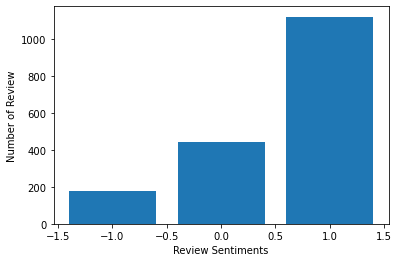

In [67]:
from matplotlib import pyplot as plt
Sentiment_count=df_tweets.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_tweets = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
df_tweets_normalised = tfid_tweets.fit_transform(df_tweets['content'])
df_tweets_normalised

<1748x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18332 stored elements in Compressed Sparse Row format>

In [71]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_normalised, df_tweets['sentiment'], test_size=0.3, random_state=1)

In [72]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train, y_train)
predicted= mnb.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7238095238095238
